# 【ML-HW02】

## 〔Question 1 : Sequential Bayesian Learning〕

### 〈 Import Library 〉

In [268]:
import numpy as np 
import pandas as pd
import scipy.io as scio
import matplotlib.pyplot as plt

### 〈 Function define 〉

In [269]:
#load data
def load_data(datapath):
    data = pd.read_csv(datapath)
    data_x = np.array(data[['X']])
    data_t = np.array(data[['T']])
    print(f'data.csv_shape:{data.shape}')
    print(f'data_x_shape:{data_x.shape}')
    print(f'data_t_shape:{data_t.shape}')
    return data_x, data_t

#sigmoid basis fuctions of the form phi(x) with logistic function
def logistic_sigmoid(t):
    basis_func_result = 1 / (1 + np.exp(-t))
    return basis_func_result

#compute the mean vector Mn and the covariance matrix Sn 
def caculate_Mn_Sn(beta, data_x, data_t):
    #initial
    m0 = np.zeros((3,1))
    s0_inv = (1e-6) * (np.eye(3))
    
    #calculate Sn inverse
    s_inv = s0_inv + (beta * np.dot(data_x[0:1, :].T, data_x[0:1, :]))
#     print("current s inverse =",s_inv)
    m = np.dot(np.linalg.inv(s_inv), (np.dot(s0_inv, m0))) + np.dot(np.linalg.inv(s_inv), (beta * np.dot(data_x[0:1, :].T, data_t[0:1, :]) ))
#     print("current m =",m)       
    
    iter_num = data_x.shape[0]
#     print("iter_num=",iter_num)
    for i in range(1, iter_num):
        update_Sn_inv = s_inv + (beta * np.dot(data_x[i:i+1, :].T, data_x[i:i+1, :]))
        
        #update mean vector Mn, covariance matrix Sn value
        m = np.dot(np.linalg.inv(update_Sn_inv), (np.dot(s_inv, m))) + np.dot(np.linalg.inv(update_Sn_inv), beta * np.dot(data_x[i:i+1, :].T, data_t[i:i+1, :]))
        s_inv = update_Sn_inv
        final_Sn = np.linalg.inv(s_inv)
        final_Mn = m
    return final_Sn, final_Mn

def fit_data_seq(m, cov, data_x_sig):
    weight01, weight02, weight03 = np.random.multivariate_normal(m,  cov,  10000).T
    w = np.vstack([weight01,  weight02,  weight03])
    seq_update = np.dot(data_x_sig, w[:,0:5])
    return seq_update

In [270]:
# Load Data
data_path = ('/home/ShaoWenLC/ML/HW2/data.csv')
data_x, data_t = load_data(data_path)

# print("-------------------")
# print("data_x shape =", data_x.shape)
# print(data_x)
# print("-------------------")
# print("data_t shape =", data_t.shape)
# print(data_t)
# print("-------------------")

data.csv_shape:(100, 2)
data_x_shape:(100, 1)
data_t_shape:(100, 1)


╔═══════╗
║  1.1  ║
╚═══════╝
╔═══════════════════╗
║  Data size N = 5  ║
╚═══════════════════╝
※mean vector Mn :
[[ 15.3918259 ]
 [-27.24893207]
 [ 13.76463907]]
※covariance matrix Sn :
[[ 269.04934203 -577.62671303  361.07317844]
 [-577.62671303 1261.47181152 -803.66739994]
 [ 361.07317844 -803.66739994  523.15065575]]
-----------------------------------------------
╔═══════════════════╗
║  Data size N = 10 ║
╚═══════════════════╝
※mean vector Mn :
[[ 15.3974152 ]
 [-27.40629378]
 [ 14.00195039]]
※covariance matrix Sn :
[[ 168.04688541 -341.15540081  202.52975073]
 [-341.15540081  706.27405822 -429.99999167]
 [ 202.52975073 -429.99999167  270.34416277]]
-----------------------------------------------
╔═══════════════════╗
║  Data size N = 30 ║
╚═══════════════════╝
※mean vector Mn :
[[ 19.22763557]
 [-35.78002777]
 [ 19.39941303]]
※covariance matrix Sn :
[[ 24.12006368 -54.9357445   37.11498943]
 [-54.9357445  127.7793514  -88.33383235]
 [ 37.11498943 -88.33383235  62.70588466]]
----

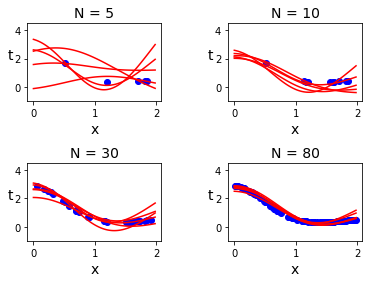

In [271]:
print('╔═══════╗')
print('║  1.1  ║')
print('╚═══════╝')
#define parameter settings
M = 3
s = 0.6
j_max = M-1 

#phi array (phi0 ~ phi2)
sigmoidal_basis_function = np.zeros((100, 3))

for i in range(0, j_max+1):
    sigmoidal_basis_function[ : , i:i+1] = logistic_sigmoid((data_x - (2*i /M))/ s)

# sigmoidal_basis_function[ : , 0:1] = logistic_sigmoid((data_x - (2 * 0 / M))/ s)
# sigmoidal_basis_function[ : , 1:2] = logistic_sigmoid((data_x - (2 * 1 / M))/ s)
# sigmoidal_basis_function[ : , 2:3] = logistic_sigmoid((data_x - (2 * 2 / M))/ s)
#print(sigmoidal_basis_function)

#N=5
data_x_5  = sigmoidal_basis_function[ :5,  :]
data_t_5  = data_t[ :5,  :]

#N=10
data_x_10 = sigmoidal_basis_function[ :10, :]
data_t_10 = data_t[ :10, :]

#N=30
data_x_30 = sigmoidal_basis_function[ :30, :]
data_t_30 = data_t[ :30, :]

#N=80
data_x_80 = sigmoidal_basis_function[ :80, :]
data_t_80 = data_t[ :80, :]

#compute the mean vector Mn and the covariance matrix Sn 
S_N5, M_N5 = caculate_Mn_Sn(1, data_x_5, data_t_5)
print('╔═══════════════════╗')
print('║  Data size N = 5  ║')
print('╚═══════════════════╝')
print('※mean vector Mn :')
print(M_N5)
print('※covariance matrix Sn :')
print(S_N5)
print("-----------------------------------------------")
S_N10, M_N10 = caculate_Mn_Sn(1, data_x_10, data_t_10)
print('╔═══════════════════╗')
print('║  Data size N = 10 ║')
print('╚═══════════════════╝')
print('※mean vector Mn :')
print(M_N10)
print('※covariance matrix Sn :')
print(S_N10)
print("-----------------------------------------------")
S_N30, M_N30 = caculate_Mn_Sn(1, data_x_30, data_t_30)
print('╔═══════════════════╗')
print('║  Data size N = 30 ║')
print('╚═══════════════════╝')
print('※mean vector Mn :')
print(M_N30)
print('※covariance matrix Sn :')
print(S_N30)
print("-----------------------------------------------")
S_N80, M_N80 = caculate_Mn_Sn(1, data_x_80, data_t_80)
print('╔═══════════════════╗')
print('║  Data size N = 80 ║')
print('╚═══════════════════╝')
print('※mean vector Mn :')
print(M_N80)
print('※covariance matrix Sn :')
print(S_N80)
print("-----------------------------------------------")

new_rand_data = np.arange(0, 2, 0.02).reshape((100,1))
new_rand_data_sigmoid = np.zeros((100, 3))

for i in range(0, j_max+1):
    new_rand_data_sigmoid[ : , i:i+1] = logistic_sigmoid((new_rand_data - (2*i /M))/ s)

fit_N5  = fit_data_seq(M_N5.T[0],   S_N5,  new_rand_data_sigmoid)
fit_N10 = fit_data_seq(M_N10.T[0],  S_N10, new_rand_data_sigmoid)
fit_N30 = fit_data_seq(M_N30.T[0],  S_N30, new_rand_data_sigmoid)
fit_N80 = fit_data_seq(M_N80.T[0],  S_N80, new_rand_data_sigmoid)


# plot 1.1
plt.figure()
plt.subplots_adjust(wspace =0.5, hspace =0.8)
    
plt.subplot(2, 2, 1)
plt.plot(data_x[:5,:], data_t[:5,:], 'bo') 
plt.plot(new_rand_data, fit_N5[:, 0:1], 'r')
plt.plot(new_rand_data, fit_N5[:, 1:2], 'r')
plt.plot(new_rand_data, fit_N5[:, 2:3], 'r')
plt.plot(new_rand_data, fit_N5[:, 3:4], 'r')
plt.plot(new_rand_data, fit_N5[:, 4:5], 'r')
# setting range of Coordinate axis
# plt.xlim((0, 2))
plt.ylim((-1, 4.5))
plt.xlabel('x', fontsize=14)
plt.ylabel('t', fontsize=14, rotation=0)
plt.title('N = 5', fontsize=14)
    
plt.subplot(2, 2, 2)
plt.plot(data_x[:10,:], data_t[:10,:], 'bo') 
plt.plot(new_rand_data, fit_N10[:, 0:1], 'r')
plt.plot(new_rand_data, fit_N10[:, 1:2], 'r')
plt.plot(new_rand_data, fit_N10[:, 2:3], 'r')
plt.plot(new_rand_data, fit_N10[:, 3:4], 'r')
plt.plot(new_rand_data, fit_N10[:, 4:5], 'r')
# setting range of Coordinate axis
# plt.xlim((0, 2))
plt.ylim((-1, 4.5))
plt.xlabel('x', fontsize=14)
plt.ylabel('t', fontsize=14, rotation=0)
plt.title('N = 10', fontsize=14)
    
plt.subplot(2, 2, 3)
plt.plot(data_x[:30,:], data_t[:30,:], 'bo') 
plt.plot(new_rand_data, fit_N30[:, 0:1], 'r')
plt.plot(new_rand_data, fit_N30[:, 1:2], 'r')
plt.plot(new_rand_data, fit_N30[:, 2:3], 'r')
plt.plot(new_rand_data, fit_N30[:, 3:4], 'r')
plt.plot(new_rand_data, fit_N30[:, 4:5], 'r')

# setting range of Coordinate axis
# plt.xlim((0, 2))
plt.ylim((-1, 4.5))
plt.xlabel('x', fontsize=14)
plt.ylabel('t', fontsize=14, rotation=0)
plt.title('N = 30', fontsize=14)

plt.subplot(2, 2, 4)
plt.plot(data_x[:80,:], data_t[:80,:], 'bo') 
plt.plot(new_rand_data, fit_N80[:, 0:1], 'r')
plt.plot(new_rand_data, fit_N80[:, 1:2], 'r')
plt.plot(new_rand_data, fit_N80[:, 2:3], 'r')
plt.plot(new_rand_data, fit_N80[:, 3:4], 'r')
plt.plot(new_rand_data, fit_N80[:, 4:5], 'r')
# setting range of Coordinate axis
# plt.xlim((0, 2))
plt.ylim((-1, 4.5))
plt.xlabel('x', fontsize=14)
plt.ylabel('t', fontsize=14, rotation=0)
plt.title('N = 80', fontsize=14)

plt.show()

╔═══════╗
║  1.2  ║
╚═══════╝


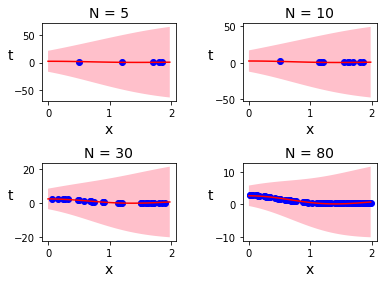

In [272]:
print('╔═══════╗')
print('║  1.2  ║')
print('╚═══════╝')

Sn_5_range = [S_N5[0,0]**(0.5), S_N5[1,1]**(0.5), S_N5[2,2]**(0.5)]
Sn_5_plot_up = M_N5.T + Sn_5_range
Sn_5_plot_low = M_N5.T - Sn_5_range
data_Sn_5_up = np.dot(new_rand_data_sigmoid, Sn_5_plot_up.T)
# print(f'data_5_up:{data_5_up}')
data_Sn_5_low = np.dot(new_rand_data_sigmoid, Sn_5_plot_low.T)
# print(f'data_5_low:{data_5_low}')
mean_Sn_5 = np.dot(new_rand_data_sigmoid, M_N5)

Sn_10_range = [S_N10[0,0]**(0.5), S_N10[1,1]**(0.5), S_N10[2,2]**(0.5)]
Sn_10_plot_up = M_N10.T + Sn_10_range
Sn_10_plot_low = M_N10.T - Sn_10_range
data_Sn_10_up = np.dot(new_rand_data_sigmoid, Sn_10_plot_up.T)
data_Sn_10_low = np.dot(new_rand_data_sigmoid, Sn_10_plot_low.T)
mean_Sn_10 = np.dot(new_rand_data_sigmoid, M_N10)

Sn_30_range = [S_N30[0,0]**(0.5), S_N30[1,1]**(0.5), S_N30[2,2]**(0.5)]
Sn_30_plot_up = M_N30.T + Sn_30_range
Sn_30_plot_low = M_N30.T - Sn_30_range
data_Sn_30_up = np.dot(new_rand_data_sigmoid, Sn_30_plot_up.T)
data_Sn_30_low = np.dot(new_rand_data_sigmoid, Sn_30_plot_low.T)
mean_Sn_30 = np.dot(new_rand_data_sigmoid, M_N30)

Sn_80_range = [S_N80[0,0]**(0.5), S_N80[1,1]**(0.5), S_N80[2,2]**(0.5)]
Sn_80_plot_up = M_N80.T + Sn_80_range
Sn_80_plot_low = M_N80.T - Sn_80_range
data_Sn_80_up = np.dot(new_rand_data_sigmoid, Sn_80_plot_up.T)
data_Sn_80_low = np.dot(new_rand_data_sigmoid, Sn_80_plot_low.T)
mean_Sn_80 = np.dot(new_rand_data_sigmoid, M_N80)


# plot 1.2
plt.figure()
plt.subplots_adjust(wspace =0.5, hspace =0.8)

plt.subplot(2, 2, 1)
plt.fill_between(new_rand_data.T[0], data_Sn_5_up.T[0], data_Sn_5_low.T[0], facecolor='pink')
plt.plot(data_x[:5,:], data_t[:5,:], 'bo') 
plt.plot(new_rand_data, mean_Sn_5, 'r')
# plt.xlim((0, 2))
# plt.ylim((-5, 5))
plt.xlabel('x', fontsize=14)
plt.ylabel('t', fontsize=14, rotation=0)
plt.title('N = 5', fontsize=14)

plt.subplot(2, 2, 2)
plt.fill_between(new_rand_data.T[0], data_Sn_10_up.T[0], data_Sn_10_low.T[0], facecolor='pink')
plt.plot(data_x[:10,:], data_t[:10,:], 'bo') 
plt.plot(new_rand_data, mean_Sn_10, 'r')
# plt.xlim((0, 2))
# plt.ylim((-5, 5))
plt.xlabel('x', fontsize=14)
plt.ylabel('t', fontsize=14, rotation=0)
plt.title('N = 10', fontsize=14)

plt.subplot(2, 2, 3)
plt.fill_between(new_rand_data.T[0], data_Sn_30_up.T[0], data_Sn_30_low.T[0], facecolor='pink')
plt.plot(data_x[:30,:], data_t[:30,:], 'bo') 
plt.plot(new_rand_data, mean_Sn_30, 'r')
# plt.xlim((0, 2))
# plt.ylim((-5, 5))
plt.xlabel('x', fontsize=14)
plt.ylabel('t', fontsize=14, rotation=0)
plt.title('N = 30', fontsize=14)

plt.subplot(2, 2, 4)
plt.fill_between(new_rand_data.T[0], data_Sn_80_up.T[0], data_Sn_80_low.T[0], facecolor='pink')
plt.plot(data_x[:80,:], data_t[:80,:], 'bo') 
plt.plot(new_rand_data, mean_Sn_80, 'r')
# plt.xlim((0, 2))
# plt.ylim((-5, 5))
plt.xlabel('x', fontsize=14)
plt.ylabel('t', fontsize=14, rotation=0)
plt.title('N = 80', fontsize=14)
plt.show()

╔═══════╗
║  1.3  ║
╚═══════╝


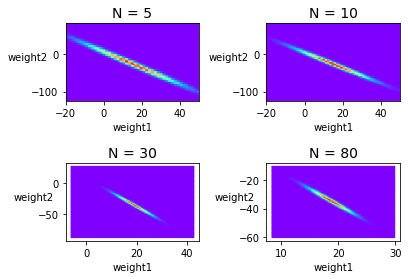

In [273]:
print('╔═══════╗')
print('║  1.3  ║')
print('╚═══════╝')

# np.random.multivariate_normal(mean, cov, size)
weight01_Sn_5,   weight02_Sn_5,   weight03_Sn_5  = np.random.multivariate_normal(M_N5.T[0],  S_N5,  100000).T
# print(f'weight01_Sn_5 = :{weight01_Sn_5.shape}')
weight01_Sn_10,  weight02_Sn_10,  weight03_Sn_10 = np.random.multivariate_normal(M_N10.T[0], S_N10, 100000).T
weight01_Sn_30,  weight02_Sn_30,  weight03_Sn_30 = np.random.multivariate_normal(M_N30.T[0], S_N30, 100000).T
weight01_Sn_80,  weight02_Sn_80,  weight03_Sn_80 = np.random.multivariate_normal(M_N80.T[0], S_N80, 100000).T

# w_5  = np.vstack([weight01_Sn_5,  weight02_Sn_5,  weight03_Sn_5])
# w_10 = np.vstack([weight01_Sn_10, weight02_Sn_10, weight03_Sn_10])
# w_30 = np.vstack([weight01_Sn_30, weight02_Sn_30, weight03_Sn_30])
# w_80 = np.vstack([weight01_Sn_80, weight02_Sn_80, weight03_Sn_80])

# line_5  = np.dot(new_rand_data_sigmoid, w_5 [:, 0:5])
# line_10 = np.dot(new_rand_data_sigmoid, w_10[:, 0:5])
# line_30 = np.dot(new_rand_data_sigmoid, w_30[:, 0:5])
# line_80 = np.dot(new_rand_data_sigmoid, w_80[:, 0:5])

# 1.3
plt.figure()
plt.subplots_adjust(wspace =0.5, hspace =0.8)
    
plt.subplot(2, 2, 1)
plt.hexbin(weight01_Sn_5, weight02_Sn_5, cmap='rainbow')
plt.xlim((-20, 50))
plt.ylim((-125, 80))
plt.xlabel('weight1')
plt.ylabel('weight2', rotation=0)
plt.title('N = 5', fontsize=14)

plt.subplot(2, 2, 2)
plt.hexbin(weight01_Sn_10, weight02_Sn_10, cmap='rainbow')
plt.xlim((-20, 50))
plt.ylim((-125, 80))
plt.xlabel('weight1')
plt.ylabel('weight2', rotation=0)
plt.title('N = 10', fontsize=14)

plt.subplot(2, 2, 3)
plt.hexbin(weight01_Sn_30, weight02_Sn_30, cmap='rainbow')
plt.xlabel('weight1')
plt.ylabel('weight2', rotation=0)
plt.title('N = 30', fontsize=14)

plt.subplot(2, 2, 4)
plt.hexbin(weight01_Sn_80, weight02_Sn_80, cmap='rainbow')
plt.xlabel('weight1')
plt.ylabel('weight2', rotation=0)
plt.title('N = 80', fontsize=14)
plt.show()

In [274]:
# new_rand_data_sigmoid[:,0:1] = logistic_sigmoid((new_rand_data - (2 * 0 / M))/ s)
# new_rand_data_sigmoid[:,1:2] = logistic_sigmoid((new_rand_data - (2 * 1 / M))/ s)
# new_rand_data_sigmoid[:,2:3] = logistic_sigmoid((new_rand_data - (2 * 2 / M))/ s)

# np.random.multivariate_normal(mean, cov, size)
# weight01_Sn_5,   weight02_Sn_5,   weight03_Sn_5  = np.random.multivariate_normal(M_N5.T[0],  S_N5,  100000).T
# weight01_Sn_10,  weight02_Sn_10,  weight03_Sn_10 = np.random.multivariate_normal(M_N10.T[0], S_N10, 100000).T
# weight01_Sn_30,  weight02_Sn_30,  weight03_Sn_30 = np.random.multivariate_normal(M_N30.T[0], S_N30, 100000).T
# weight01_Sn_80,  weight02_Sn_80,  weight03_Sn_80 = np.random.multivariate_normal(M_N80.T[0], S_N80, 100000).T
# w_5  = np.vstack([weight01_Sn_5,  weight02_Sn_5,  weight03_Sn_5])
# w_10 = np.vstack([weight01_Sn_10, weight02_Sn_10, weight03_Sn_10])
# w_30 = np.vstack([weight01_Sn_30, weight02_Sn_30, weight03_Sn_30])
# w_80 = np.vstack([weight01_Sn_80, weight02_Sn_80, weight03_Sn_80])
# line_5  = np.dot(new_rand_data_sigmoid, w_5 [:,0:5])
# line_10 = np.dot(new_rand_data_sigmoid, w_10[:,0:5])
# line_30 = np.dot(new_rand_data_sigmoid, w_30[:,0:5])
# line_80 = np.dot(new_rand_data_sigmoid, w_80[:,0:5])